### QUESTÃO 4 - LETRA C

Primeiramente deve-se alterar as condições de entrada, adotando-se uma altitude de 7000 m (Pa = 45 kPa e Ta = 246,55 K).


In [38]:
import model_reference as mf
import numpy as np
import warnings
import matplotlib.pyplot as plt

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

values = {
    'mass_flow': 6.7,  # Vazão mássica = vazão de ar no compressor [kg/s]
    't04': 1400,       # Temperatura da saída da câmara de combustão [K]
    'prc': 12,         # Razão de pressão do compressor
    'mach': 0,         # Mach de voo [M]
    'ta': 288.2,       # Temperatura ambiente [K]
    'pa': 101.3,       # Pressão ambiente [kPa]
    'n_d': 0.85,       # Eficiência da entrada de ar
    'gamma_d': 1.4,    # Gamma da entrada de ar
    'n_c': 0.75,       # Eficiência do compressor
    'gamma_c': 1.37,   # Gamma do compressor
    'n_b': 1,          # Eficiência da câmera de combustão
    'gamma_b': 1.35,   # Gamma da câmera de combustão
    'n_t': 0.9,        # Eficiência da turbina do compressor
    'gamma_t': 1.33,   # Gamma da turbina do compressor
    'n_tl': 0.9,       # Eficiência da turbina livre
    'gamma_tl': 1.33,  # Gamma da turbina livre
    'n_n': 0.98,       # Eficiência do bocal de gases quentes
    'gamma_n': 1.36,   # Gamma do bocal de gases quentes
    'pc_fuel': 45000,  # Poder calorífico inferior do combustível [kJ/kg]
    'cp_fuel': 1.110,  # Cp no combustor [kJ/(kg.K)]  
    'cp_tls': 1.160,
    'cp_tl': 1.110, 
    'r': 288.3,        # R médio m2/(s2.K)
    'pr_tl': 2.406,     # Razão de pressão da turbina livre    
    'gearbox_power_ratio': 0.98,  # Razão de potência da gearbox
    'propeller_efficiency': 0.85, # Eficiência da hélice
    }


## INICIO DA QUESTÃO 4 - LETRA C ##

#Atualização de values para a letra c
values["pa"] = 45
values["ta"] = 246.55

Em seguida, deve-se variar os valores de número de Mach (0.25, 0.35 e 0.45), alterando-se valores de rotação do gerador de gás (entre 65% e 100% do valor nominal máximo), para cada valor de Mach.

In [39]:
#Variáveis procuradas (alvos) e suas unidades
target = ['thrust_propeller', 'thrust_hot_air', 'thrust_total', 'BSFC', 'EBSFC', 'TSFC', 'fuel_consumption']
target_title = ['Empuxo produzido pela hélice', 'Empuxo produzido pelo Bocal', 'Empuxo produzido total', 'BSFC', 'EBSFC', 'TSFC', 'Consumo de combustível']
target_ylabel = ['Empuxo [kN]', 'Empuxo [kN]', 'Empuxo [kN]', 'BSFC [kg/(kW.s)]', 'EBSFC [kg/(kW.s)]', 'TSFC [kg/(kN.s)]', 'Consumo de combustível [kg/s]']

#valores de mach utilizados
mach = [0.25, 0.35, 0.45]

#laço variando os valores de mach
for i in mach:

    values["mach"] = i

    turboprop = mf.TurboProp(values)
    performance_results = turboprop.sumarise_results()
    results = (turboprop.sumarise().append(turboprop.sumarise_results()).loc[target])

    # laço variando os valores de N2
    for j in np.linspace(1.0, 0.65, 20):

        turboprop.set_n2(j)
        results[j] = (turboprop.sumarise().append(turboprop.sumarise_results()).loc[target])

    results = results.loc[target]

    # alocando os resultados para cada mach (para plotar posteriormente)
    if i==mach[0]:

        results1 = results
    
    elif i==mach[1]:

        results2 = results

    elif i==mach[2]:

        results3 = results


Por fim, deve-se plotar os gráficos, mostrando-se a relação entre os parâmetros específicos e os valores de N2, para cada valor de Mach.

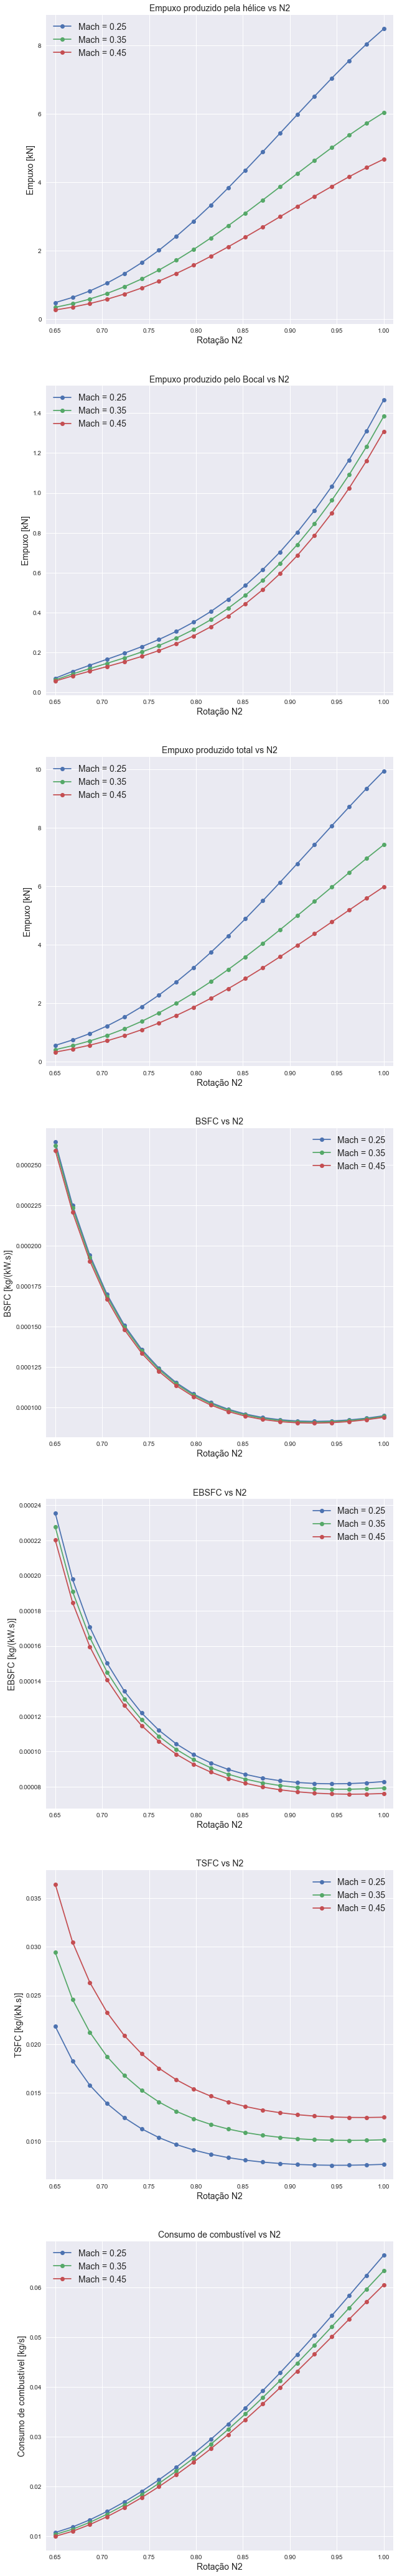

In [40]:
#plot dos graficos
fontsize=14
cols = 1
rows= 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10,75))
aux=0

for i in range(0,rows):

    for j in range(0,cols):

        plt.sca(ax[i])
        plt.plot(results1.iloc[aux], marker='o', label="Mach = " + str(mach[0]))
        plt.plot(results2.iloc[aux], marker='o', label="Mach = " + str(mach[1]))
        plt.plot(results3.iloc[aux], marker='o', label="Mach = " + str(mach[2]))
        plt.title(target_title[aux]+" vs N2", fontsize=fontsize)
        plt.xlabel('Rotação N2', fontsize=fontsize)
        plt.ylabel(target_ylabel[aux], fontsize=fontsize)
        plt.xlim([0.64,1.01])
        plt.legend(fontsize=fontsize)
        aux += 1
